# Analysis on Netflix & TV Shows

In [1]:
# Netflix is a popular service that people across the world use for entertainment. 
# In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn

# Package Install and Import

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# LOADING THE DATASET

In [4]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# DATA PREPARATION AND CLEANING

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# There are 8807 entries and 12 columns to work with for EDA.
# There are few columns that contain null values('director ','cast','country','date_added','rating','duration')

In [8]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# HANDLING NULL VALUES

In [9]:
netflix_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
netflix_df.isnull().values.any()

True

In [11]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
netflix_df.isnull().sum().sum()

4307

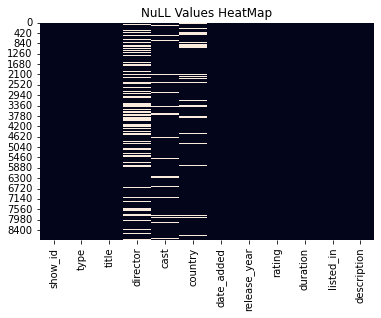

In [13]:
plt.title('NuLL Values HeatMap')
sns.heatmap(netflix_df.isnull(), cbar=False);


In [14]:
netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('country unavailable', inplace=True)
netflix_df.dropna(subset=['date_added','rating','duration'], inplace=True)

In [15]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [16]:
# SPLITTING the DATASET into NEW DATASETS 'MOVIES' and 'TV SHOWS'

In [17]:
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",country unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [18]:
netflix_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# DATA PREPARATION

In [19]:
netflix_shows_df.duration

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2664, dtype: object

In [20]:
netflix_movies_df.duration

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6126, dtype: object

In [21]:

# we need to convert the values of duration column to int type to make the EDA easier
# and we change the column name of netflix_shows from duration to seasons
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'},inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}},inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

# EXPLORATORY ANALYSIS AND VISUALISATION

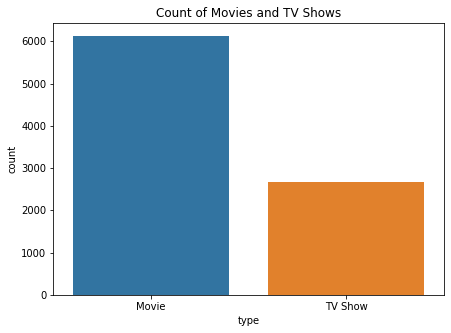

In [22]:
# COMPARISON BETWEEN TOTAL NUMBER OF MOVIES AND TV SHOWS IN THE DATASET

plt.figure(figsize=(7,5))
plt.title("Count of Movies and TV Shows")
plt.xlabel("(Movie / TV Show)")
plt.ylabel("Total Count")
temp = sns.countplot(netflix_df.type)
plt.show()

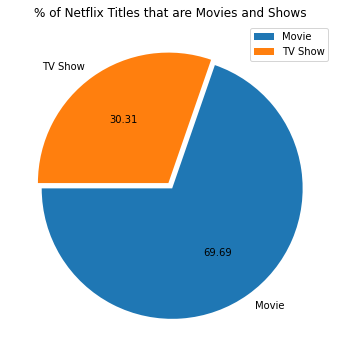

In [23]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are Movies and Shows")
temp = plt.pie(netflix_df.type.value_counts(),explode=(.025,.025), autopct='%.2f', startangle=180, labels=netflix_df.type.value_counts().index);
plt.legend()
plt.show()

# NETFLIX FILM RATINGS

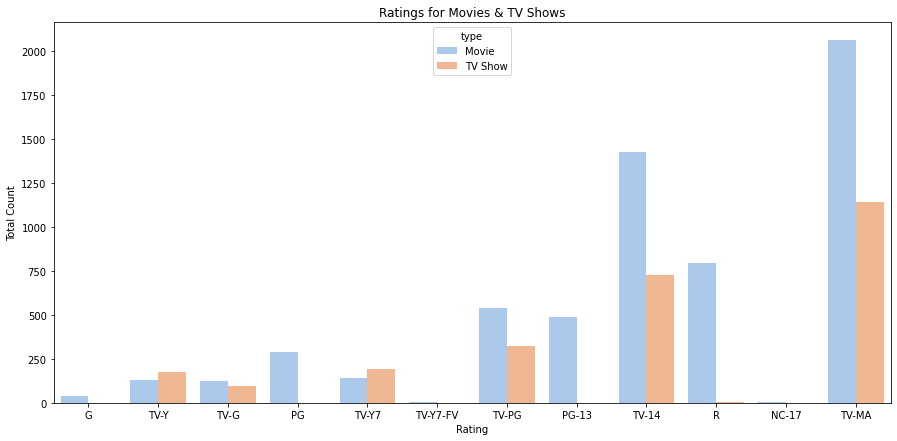

In [24]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
temp = sns.countplot(netflix_df.rating, hue=netflix_df.type,order=order, palette="pastel")
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

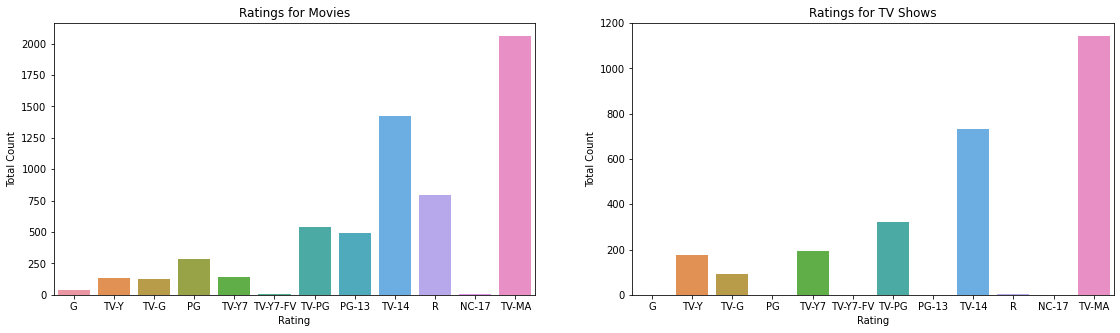

In [25]:
fig , ax = plt.subplots(1,2, figsize=(19,5))
temp1 = sns.countplot(netflix_movies_df.rating,order=order,ax=ax[0])
temp1.set_title("Ratings for Movies")
temp1.set_xlabel("Rating")
temp1.set_ylabel("Total Count")
temp2 = sns.countplot(netflix_shows_df.rating,order=order,ax=ax[1])
temp2.set_title("Ratings for TV Shows")
temp2.set_xlabel("Rating")
temp2.set_ylabel("Total Count")
plt.show()

# CONTENT ADDED EACH YEAR

In [26]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [27]:
netflix_year_count = netflix_df['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})


In [28]:
movie_year = netflix_movies_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})
tv_show_year = netflix_shows_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})


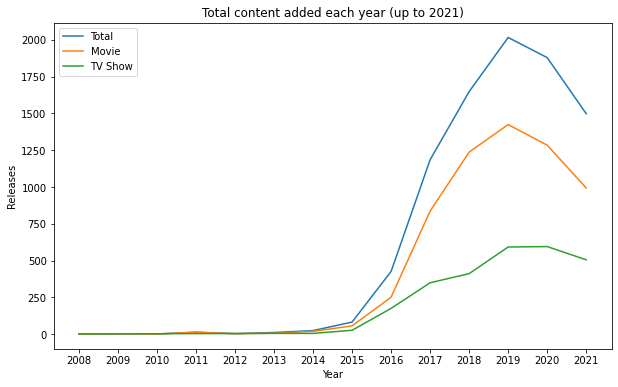

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year_count, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=tv_show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

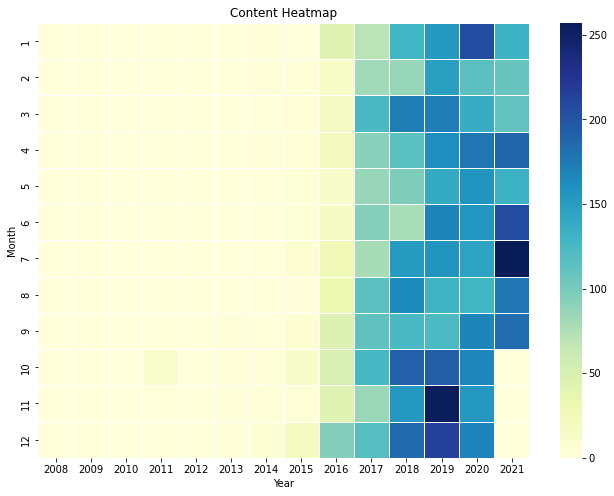

In [30]:
month_year_df = netflix_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.5, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# NETFLIX FILM DURATION

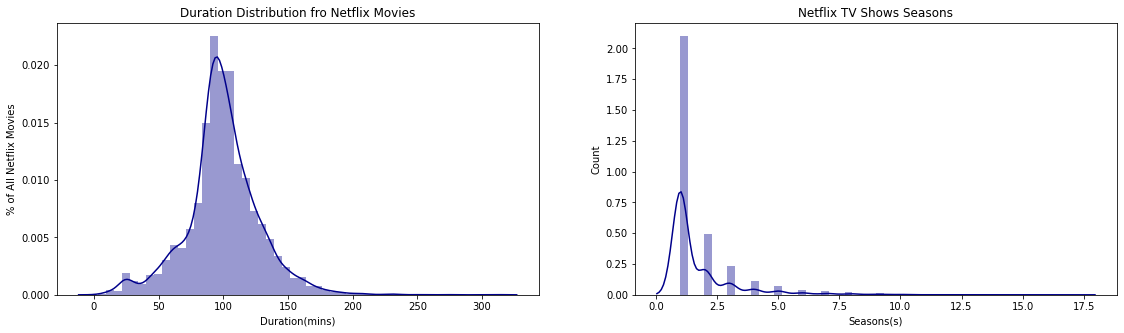

In [31]:
fig , ax = plt.subplots(1,2, figsize=(19,5))
temp1 = sns.distplot(netflix_movies_df.duration, color='darkblue', ax=ax[0])
temp1.set_title("Duration Distribution fro Netflix Movies")
temp1.set_xlabel("Duration(mins)")
temp1.set_ylabel("% of All Netflix Movies")
temp2 = sns.distplot(netflix_shows_df.seasons, color='darkblue', ax=ax[1])
temp2.set_title("Netflix TV Shows Seasons")
temp2.set_xlabel("Seasons(s)")
temp2.set_ylabel("Count")
fig.show()

# Countries with the most content available

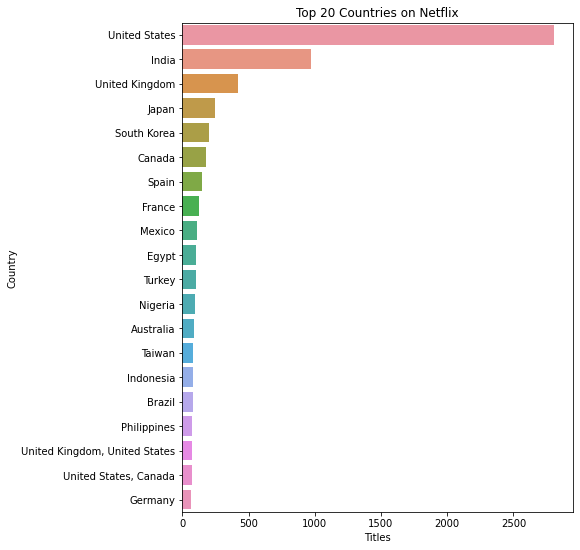

In [32]:
countries_df = netflix_df.set_index('title').country
countries_df = countries_df[countries_df != 'country unavailable']
plt.figure(figsize=(7,9))
temp = sns.countplot(y=countries_df, order=countries_df.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

# Popular Genres

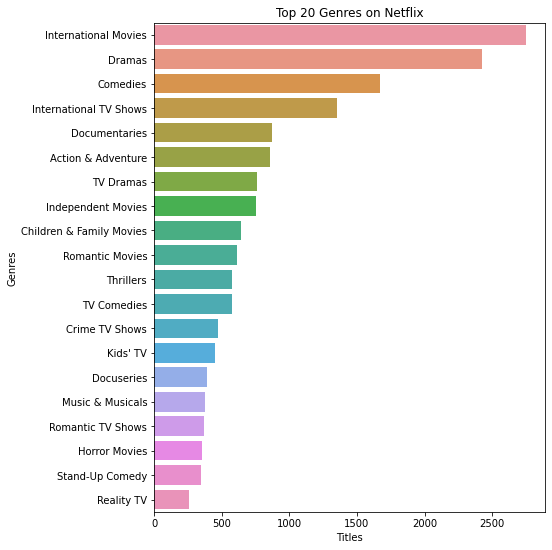

In [33]:
genres_df = netflix_df.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(7,9))
g = sns.countplot(y = genres_df, order=genres_df.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Top 10 Directors on Netflix

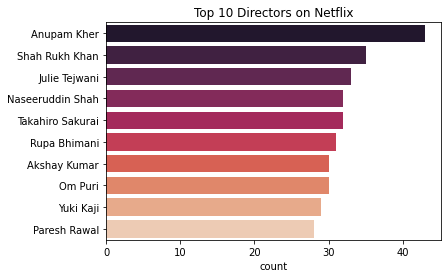

In [34]:
cast_df = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = cast_df, order=cast_df.value_counts().index[:10], palette='rocket')
plt.title("Top 10 Directors on Netflix")
plt.show()

# Conclusion

In [35]:
# It's clear that Netflix has grown over the years. We can see it from the data that the company took certain 
# approaches in their marketing strategy. A good amount of international movies and TV shows were added over 
# the years as part of Netflix's global expansion.